<a href="https://colab.research.google.com/github/karencfisher/COVID19/blob/main/notebooks/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
!unzip -q /content/drive/MyDrive/COVID-19_Radiography_Dataset/data_old.zip

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2


#### Get metadata on training set 

In [23]:
classes = ('normal', 'COVID')
data_path = 'data'

counts = []
filelists = []
for item in classes:
    filelist = os.listdir(os.path.join(data_path, 'train', item))
    filelists.append(filelist)
    counts.append(len(filelist))

images = []
labels = []
for i, item in enumerate(classes):
    image_files = random.sample(filelists[i], 3)
    for image_file in image_files:
        image_path = os.path.join(data_path, 'train', item, image_file)
        image = cv2.imread(image_path)
        images.append(image)
        labels.append(item)


In [35]:
def displayImages(images, labels):
  _, axes = plt.subplots(1, 6, figsize=(20,20))
  for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].set_title(labels[i])
    

  _, axes2 = plt.subplots(1, 6, sharey=True, figsize=(20,2))
  for i in range(len(images)):
    axes2[i].hist(images[i].ravel(),256,[0,256])
    axes2[i].set_ylim(500)


#### Visualize samples of the image data by class

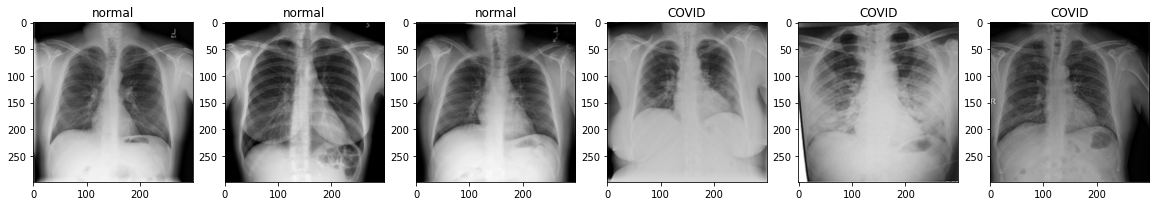

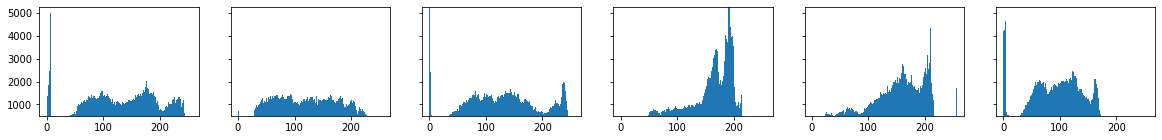

In [36]:
displayImages(images, labels)

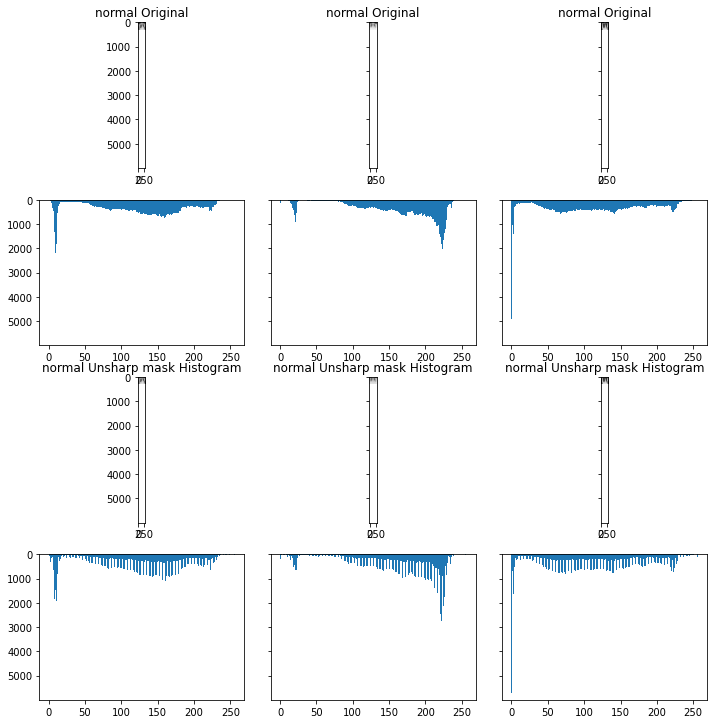

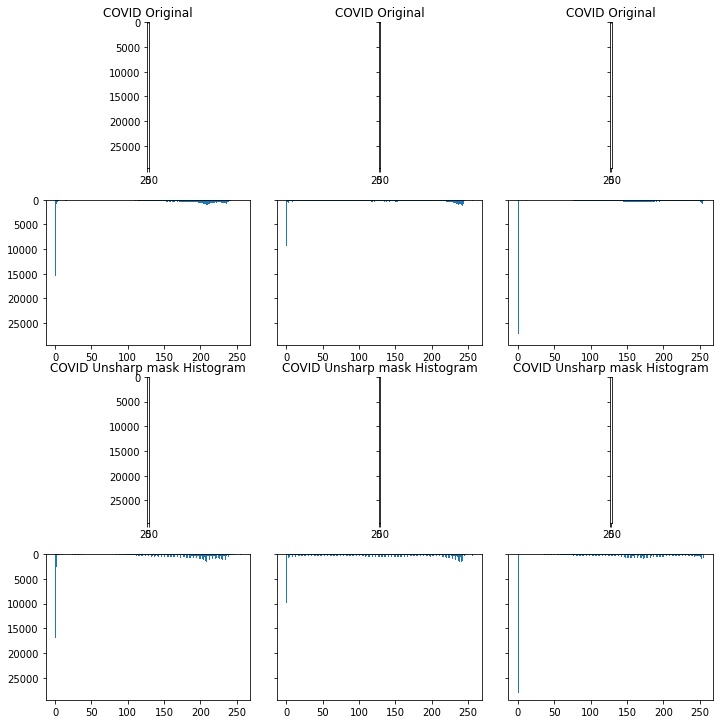

In [16]:
um_images = []
for i in range(len(images)):
  

#### Histogram Equalization

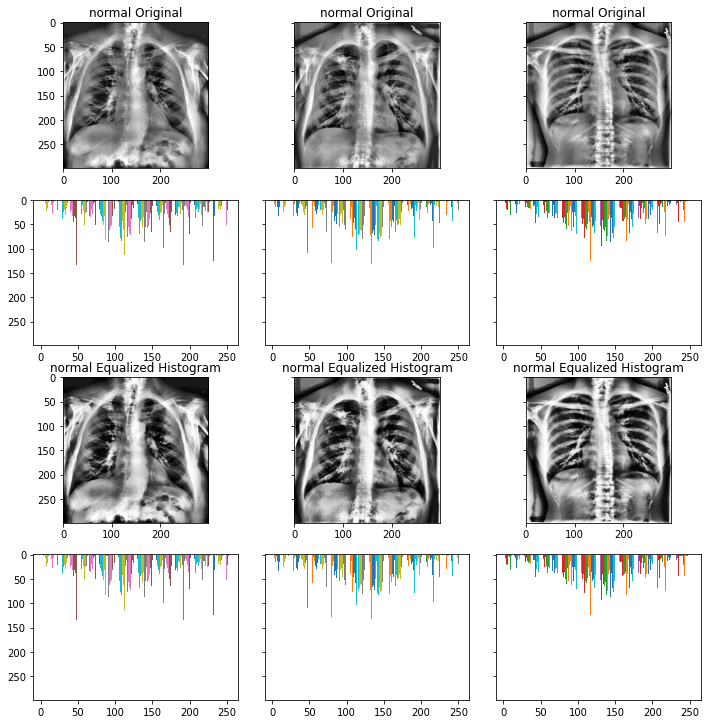

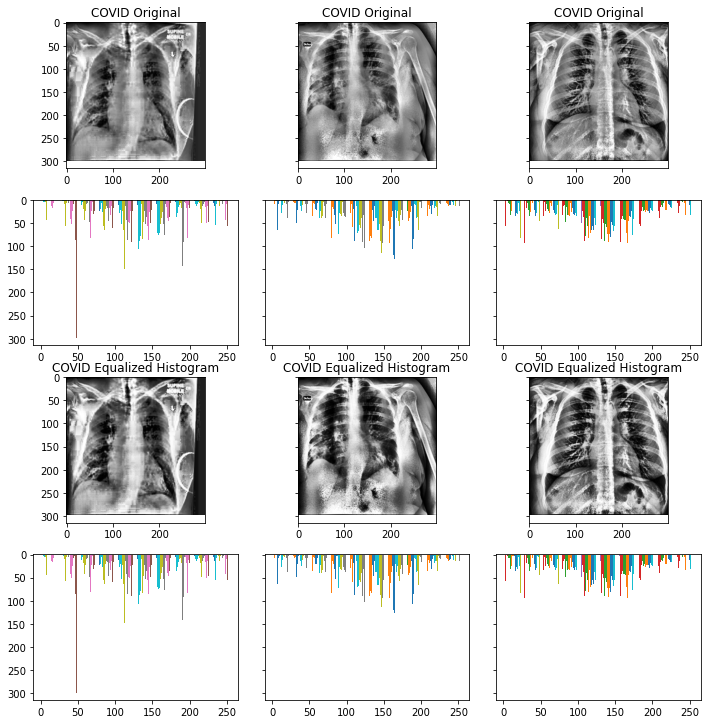

In [10]:
for i, item in enumerate(classes):
  images = random.sample(filelists[i], 3)
  f, axes = plt.subplots(4, 3, sharey=True, figsize=(10, 10))
  #f.set_figwidth(10)
  plt.tight_layout()

  for j, image in enumerate(images):
    img_file = os.path.join(data_path, 'train', item, image)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    axes[0][j].imshow(img, cmap='gray')
    axes[0][j].set_title(f'{item} Original')

    axes[1][j].hist(img)

    equ = cv2.equalizeHist(img)
    axes[2][j].imshow(equ, cmap='gray')
    axes[2][j].set_title(f'{item} Equalized Histogram')

    axes[3][j].hist(img)

#### CLAHE (Contrast Limited Adaptive Histogram Equalization)

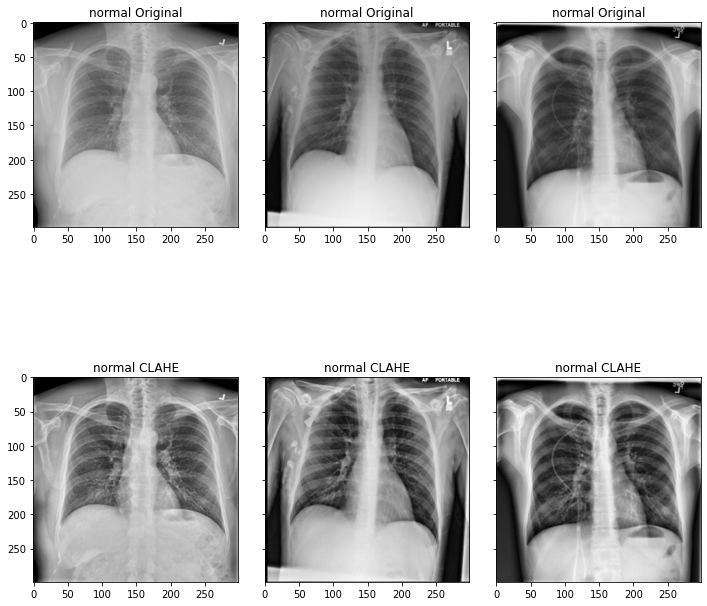

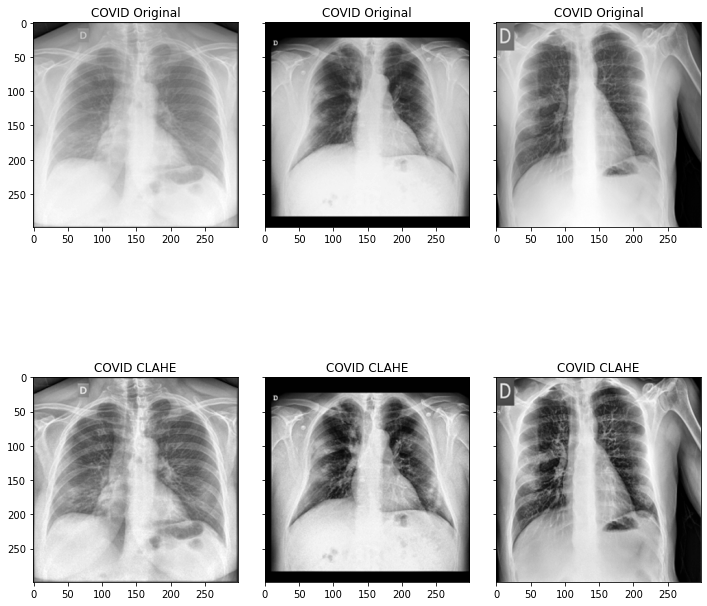

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, item in enumerate(classes):
  images = random.sample(filelists[i], 3)
  f, axes = plt.subplots(len(classes), 3, sharey=True, figsize=(10, 10))
  #f.set_figwidth(10)
  plt.tight_layout()

  for j, image in enumerate(images):
    img_file = os.path.join(data_path, 'train', item, image)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    axes[0][j].imshow(img, cmap='gray')
    axes[0][j].set_title(f'{item} Original')

    img_clahe = clahe.apply(img)
    axes[1][j].imshow(img_clahe, cmap='gray')
    axes[1][j].set_title(f'{item} CLAHE')


In [ ]:
img_file = os.path.join(data_path, 'train', item, images[1])
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_clahe = clahe.apply(img)

In [ ]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
img_clahe

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)

In [ ]:
np.amax(img_clahe)

255